# Lab Course Machine Learning
# Exercise Sheet 1
November 5th, 2021

Syed Wasif Murtaza Jafri-311226

## Exercise 1: PythonWarmup


### Part A: IPython
In this exercise, after reading the file I cleaned it and removed punctuations with RegexpTokenizer library.Then loop through the list of words in files and checked if a word is a stopword then did nothing otherwise added a dictionary of word.If word already exist in the dictionary then we just increament its counter.

In [65]:
import numpy as np
import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import statistics as st
import pandas as pd

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
stopwords = stopwords.words('english')

file = open("random_text.txt", "r")
f = file.read()
f=f.lower()

words = tokenizer.tokenize(f)

c=0;
mostOccuredWords = dict()

countedWords = list()
for i in words:
    if i not in mostOccuredWords:
        if i not in stopwords:
            mostOccuredWords[i] = 1
            countedWords.append(i)
            c+=1
    else:
        mostOccuredWords[i] +=1


To plot 10 most occured words, program sorts dictionary of most occured words in descending
order by value then inner loop matches the value of dictionary with sorted dictoinary to pick top
5 most occurances

{'sed': 12, 'ante': 9, 'eu': 9, 'sit': 8, 'amet': 8}
Total Words Count= 148


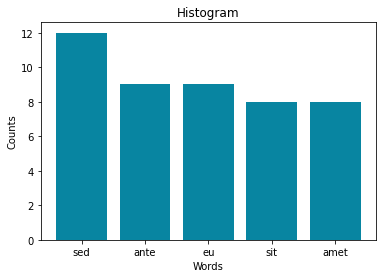

In [64]:
sortedSequence=sorted(mostOccuredWords)
finalDict = dict()
finalDictCount =0
for value in sorted(mostOccuredWords.values(),reverse=True):
    for key, val in mostOccuredWords.items():
        if len(finalDict) < 5:
            if val == value:
                finalDict[key] = value
                finalDictCount +=1
print (finalDict)
print("Total Words Count=",c)
plt.bar((finalDict.keys()), finalDict.values(),color='#0885a1')
plt.title('Histogram')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

### Part B : numpy
Created a function for convolving a block from image with filter.This function multiplies two matrices and then add each entry of the matrix.For BlurFilter() , first I am padding ones on each corner of the image matrix to apply convolve function on first pixel of the image. Calling convolve function for every pixel of image matrix passing 3x3 matrix block of image each time. Finally calling the blurFilter function multiple times.

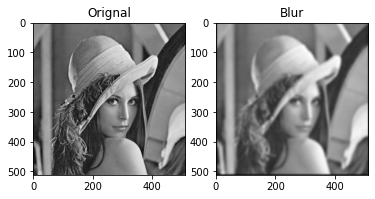

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread(r"C:\Users\wasif\lena_gray.jpg")

def convolve (matA,matB):
    sum = 0
    for i in range (0,3):
        for j in range (0,3):
            for k in range (0,3):
                sum+= matA[i][k]*matB[k][j]
    return sum

def blurFilter(img):
    #padding
    filter = (np.ones((3, 3)))/9
    padded = (np.ones((len(img)+2, len(img)+2)))

    for i in range (1,len(padded)-1) :
        for j in range (1,len(padded)-1) :
            padded[i][j] = img[i-1][j-1]
    
    
    filterImage = (np.zeros((len(padded), len(padded))))
    
    for i in range (0,len(padded)-2) :
        for j in range (0,len(padded)-2) :
            sum =convolve(padded[i:i+3,j:j+3],filter)

            filterImage[i+1][j+1] = sum
    # removing padding before returning the image
    return (filterImage[1:len(padded)-1,1:len(padded)-1])

plt.subplot(1,2,1)
plt.title('Orignal')
plt.imshow(image, cmap = 'gray')

for i in range(20):
    image = blurFilter(image)


plt.subplot(1,2,2)
plt.title('Blur')
plt.imshow(image, cmap = 'gray')
plt.show()




## Exercise 2:Linear Regression through exact form

for b0,b1 values, in this exercise we in a matrix form inversrve(X^t * X) * (X^t * Y). We write tranpose func(), in which we are switching rows to columns.First we extract the matrix for which we have to find the minor in minor(). Determinant() finds the determinant of the minor matrix. 

In [101]:
def transpose(matrix):
    return [[row[i] for row in matrix] for i in range(len(matrix[0]))]


def multiplyMatrix(X, Y):
    return [[sum(a*b for a,b in zip(X_row,Y_col)) for Y_col in zip(*Y)] for X_row in X]

def getminor(mat, i, j):
    return [row[:j] + row[j+1:] for row in (mat[:i] + mat[i + 1:])]


def deternminant(mat):

    if len(mat) == 2:
        return (mat[0][0] * mat[1][1] - mat[0][1] * mat[1][0]) * 1.0

    determinant = 0
    for c in range(len(mat)):
        determinant += ((-1.0)**c) * mat[0][c] * deternminant(minor(mat, 0, c))
    return determinant


def inverse(mat):
    determinant = deternminant(mat)

    if len(mat) == 2:
        return [[mat[1][1] / determinant, -1 * mat[0][1] / determinant],
                [-1 * mat[1][0] / determinant, mat[0][0] / determinant]]

    cofactors = []
    for r in range(len(mat)):
        cofactorRow = []
        for c in range(len(mat)):
            minor = getminor(mat, r, c)
            cofactorRow.append(((-1)**(r+c)) * deternminant(minor))
        cofactors.append(cofactorRow)
    cofactors = transpose(cofactors)
    for r in range(len(cofactors)):
        for c in range(len(cofactors)):
            cofactors[r][c] = cofactors[r][c]/determinant
    return cofactors


print (beta0,beta1,beta2)

[4.350644089645357] [1.6554811464087038] [-3.5928149987303186]


Initializing x matrix with normal distribution and y matrix with uniform distribution.Stacking one in first column of x matrix, because in linear equation ,coefficient of b0 is 1.Then finding the B=inversrve(X^t * X) * (X^t * Y).Finally, ploting it in comparision to the np library lstsq function. 

[[4.350644089645357], [1.6554811464087038], [-3.5928149987303186]]


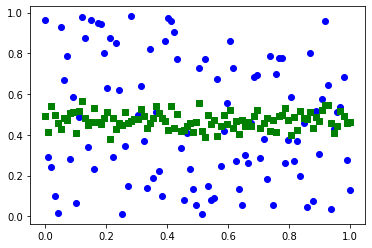

In [120]:
import numpy as np
rows = 100
col = 2
mean, sd = 2, 0.01

np.random.seed(0)
x = np.random.normal(mean, sd, (rows,col))
y = np.random.uniform(0,1,(rows,1))

#print(np.linalg.lstsq(x,y)[0])
bias_column = np.ones(shape=(100,1))
A = np.append(bias_column,x,axis=1)


aTranspose = transpose(A)
aTran_a = multiplyMatrix (aTranspose,A)
aTran_a_inv = inverse(aTran_a)

aTran_y = multiplyMatrix(aTranspose,y)

B= multiplyMatrix ((aTran_a_inv),(aTran_y))
y_hat = multiplyMatrix(A,B)
print (B)
import matplotlib.pyplot as plt
axis = np.linspace(0, 1, 100)
Y_hat = multiplyMatrix(A, B)
plt.scatter(axis, y, c='b', marker='o', label='Y')
plt.scatter(axis, y_hat, c='g', marker='s', label='Y_hat')
plt.show()


In [116]:
B = np.linalg.lstsq(A, y, rcond=None)[0]

print (B)

[[ 4.35064468]
 [ 1.65548139]
 [-3.59281555]]
